Final Project PySpecKit

In [1]:
!pip install pyspeckit
#The "!pip install https://github.com/pyspeckit/pyspeckit/archive/master.zip" is the recommended way to install pySpecKit by the authors
#"!pip install pyspeckit" also works

In [2]:
#Imports
import numpy as np
import astropy
import pyspeckit
print(pyspeckit.__version__)
import matplotlib.pyplot as plt
#import the file and unpack the columns into their different axes
angstrom, intensity = np.loadtxt("ngc253_hb.tab", unpack = True)

1.0.4.dev


'This visualization allows me to deduce the center of the spike, its amplitude and a rough width. This is important for the guesses in the Gaussian and continuum fit'

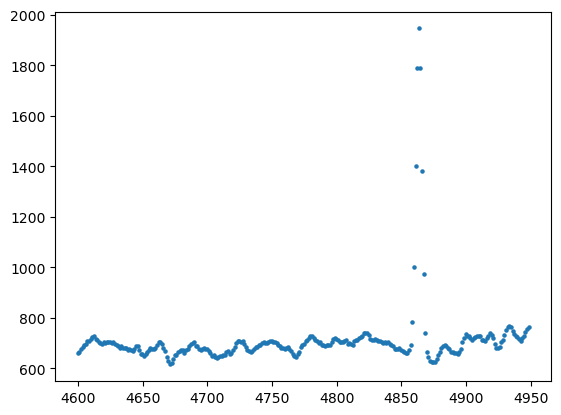

In [3]:
#Let's visualize the data using matplotlib first 
fig, ax = plt.subplots()
ax.scatter(angstrom, intensity, marker = "o", s = 5)
"""This visualization allows me to deduce the center of the spike, its amplitude and a rough width. This is important for the guesses in the Gaussian and continuum fit"""

The first figure is the fitting to the continuum which is the background and not spike at ~4863. Then the second figure is the gaussian fit 
to the spike. The second figure is the one used in the report.


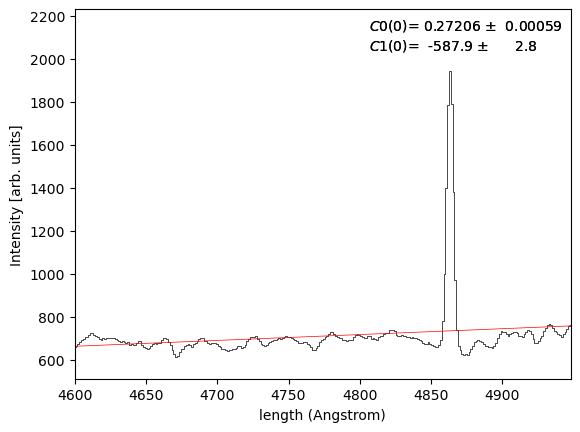

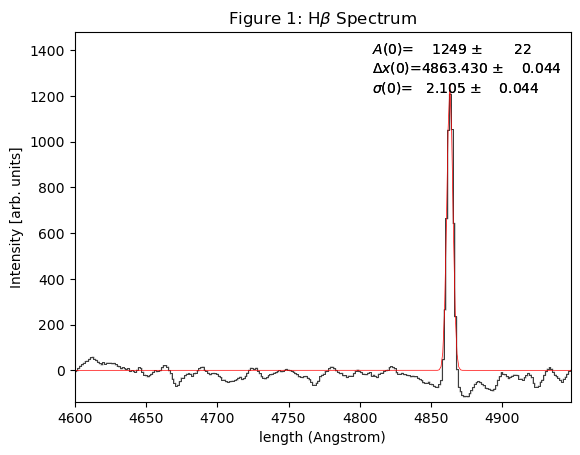

In [4]:
xaxis = angstrom
baseline = np.poly1d([650,720])(xaxis)

# Can add noise if interested. The data provided by prof Teuben has no noise so that inclusion is not done here. 

data = intensity
# There is a blank header warning that pops up, we can disregard per the pyspeckit authors, it is normal. 
sp = pyspeckit.Spectrum(data=data, xarr=xaxis,
                        xarrkwargs={'unit':'Angstrom'},
                        unit='Intensity [arb. units]')

sp.plotter()

sp.specfit.Registry.add_fitter('polycontinuum',
                               pyspeckit.models.polynomial_continuum.poly_fitter(),
                               2)

sp.specfit(fittype='polycontinuum', guesses=(0,0))

# subtract the model fit to create a new spectrum
sp_contsub = sp.copy()
sp_contsub.data -= sp.specfit.get_full_model()
sp_contsub.plotter();
# Setting the x axis to zero is useful and it doesn't make a difference since the y-axis units are arbitrary! (Otherwise could label xaxis as intensity - background)

# Fit with automatic guesses
sp_contsub.specfit(fittype='gaussian');

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
data = sp_contsub.data
amplitude_guess = data.max()-np.mean(data[0:150]) #maximum of the data minus the background subtraction to set to zero. I didn't include the full range
# since I don't want to mean to include the spectral spike 
center_guess = 4862 # read this off from the original matplotlib fit (np.argmax(data)) or from visually inspecting the data itself
width_guess = 5 #Idea is just make a very rough guess visually based on the data
guesses = [amplitude_guess, center_guess, width_guess]
sp_contsub.specfit(fittype='gaussian', guesses=guesses);

sp_contsub.plotter(errstyle='fill', title = r"Figure 1: H$\beta$ Spectrum"); # errstyle fill makes a grey color around the errors when included 
sp_contsub.specfit.plot_fit();
sp_contsub.plotter.savefig("H_beta") #Save the figure in png format 

print("""The first figure is the fitting to the continuum which is the background and not spike at ~4863. Then the second figure is the gaussian fit 
to the spike. The second figure is the one used in the report.""")